## 다항 회귀

농어의 길이와 무게에 대한 산점도를 좀더 반영하면 직선이 아닌 곡선이며, 이는 2차 방정식 그래프이다. 

2차방정식 그래프를 그리기 위해서는 길이를 제곱한 항이 훈련세트에 추가되어야 함을 의미한다. 

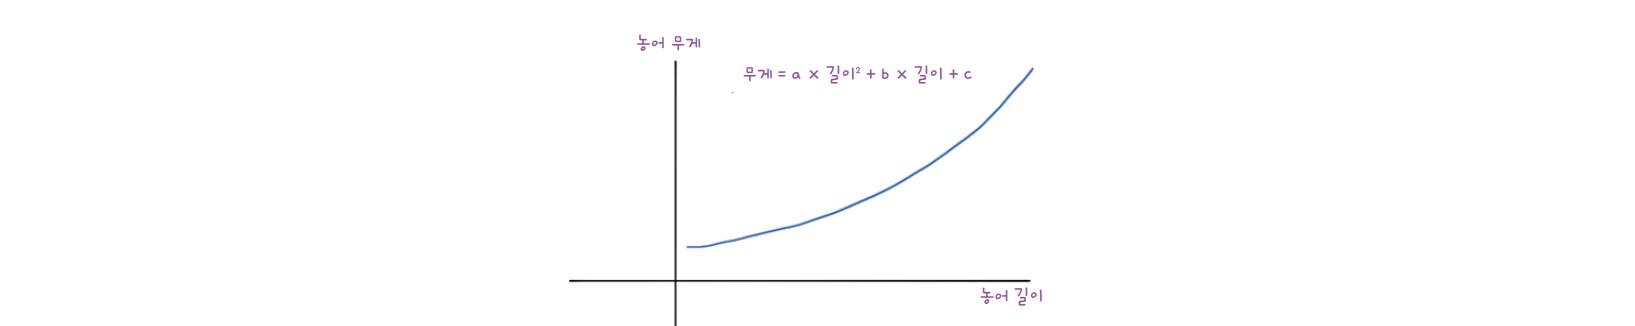

## 데이타 전처리

* PolynomialFeature()로 피처들을 다항으로 변환


* 1차 단항 피처들의 값 $[X_1,X_2] = [2,3]$일 경우
* 2차 다항 피처들의 값은 $[1,X_1,X_2,X_1^2,X_1X_2,X_2^2] = [1,2,3,4,6,9]$로 변환
* 3차 다항 피처들의 값은 $[1,X_1,X_2,X_1^2,X_1X_2,X_2^2,X_1^3,X_1^2X_2,X_1X_2^2,X_2^3] = [1,2,3,4,6,9,8,12,18,27]$로 변환

In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

def evaluate_reg_all(y_test, y_preds):
    MSE = mean_squared_error(y_test,y_preds,squared=True)
    RMSE = mean_squared_error(y_test,y_preds,squared=False)
    MAE = mean_absolute_error(y_test,y_preds)
    R2 = r2_score(y_test,y_preds)
    
    print(f'MSE: {MSE:.3f}, RMSE: {RMSE:.3F}, MAE: {MAE:.3F}, R^2: {R2:.3F}')

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

##########데이터 로드

fish_df = pd.read_csv('./data/fish.csv')

##########데이터 분석

##########데이터 전처리

x_data = fish_df.drop(['무게'], axis=1)
y_data = fish_df['무게']

#test_size=0.3 학습용(7) : 테스트용 (3) 으로 분할
#random_state=777 동일한 학습/테스트용 데이터 세트를 생성 위해
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

from sklearn.preprocessing import PolynomialFeatures

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2, include_bias=False)

poly.fit(x_train)
poly_train = poly.transform(x_train)
poly_test = poly.transform(x_test)

print('변환된 2차 다항식 계수 feature:\n', poly_train)




변환된 2차 다항식 계수 feature:
 [[  17.4   302.76]
 [  36.   1296.  ]
 [  25.    625.  ]
 [  40.   1600.  ]
 [  39.   1521.  ]
 [  43.   1849.  ]
 [  22.    484.  ]
 [  20.    400.  ]
 [  22.    484.  ]
 [  24.    576.  ]
 [  27.5   756.25]
 [  43.   1849.  ]
 [  40.   1600.  ]
 [  24.    576.  ]
 [  21.    441.  ]
 [  27.5   756.25]
 [  40.   1600.  ]
 [  32.8  1075.84]
 [  26.5   702.25]
 [  36.5  1332.25]
 [  13.7   187.69]
 [  22.7   515.29]
 [  15.    225.  ]
 [  37.   1369.  ]
 [  35.   1225.  ]
 [  28.7   823.69]
 [  23.5   552.25]
 [  39.   1521.  ]
 [  21.    441.  ]
 [  23.    529.  ]
 [  22.    484.  ]
 [  44.   1936.  ]
 [  22.5   506.25]
 [  19.    361.  ]
 [  37.   1369.  ]
 [  22.3   497.29]
 [  25.6   655.36]
 [  42.   1764.  ]
 [  34.5  1190.25]]


In [24]:
#특성이 어떻게 만들어 졌는지 이름 출력
poly.get_feature_names_out()

array(['길이', '길이^2'], dtype=object)

In [25]:
lr = LinearRegression()
lr.fit(poly_train, y_train) #학습

y_preds = lr.predict(poly_test) #예측

#50cm 농어도 훈련때와 같은 형태로 변환해야 함
print(lr.predict([[50, 50**2]]))

[1573.96891761]


In [26]:
print(lr.coef_, lr.intercept_)

[-21.35314125   1.01195803] 111.73090767430205


---
**[농어 무게 예측 방정식]**

$ y = 1.01 * x^2 -21.6 *  x + 111.35$

---

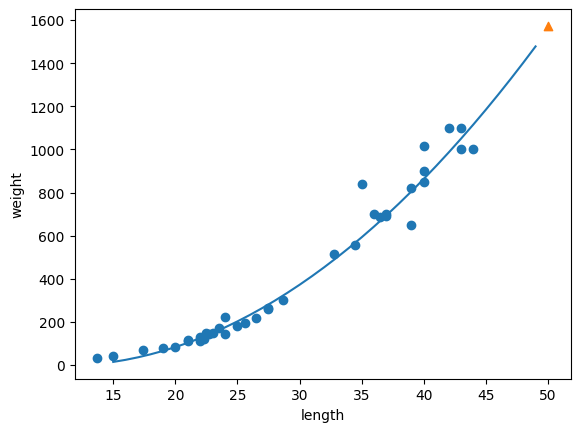

In [27]:
import matplotlib.pyplot as plt

# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그립니다
plt.scatter(x_train, y_train)

# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 111.35)

# 50cm 농어 데이터
plt.scatter([50], [1573], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

>  
> * 훈련세트의 경향을 잘 따르고 있고 무게가 음수로 나오는 일도 없다. 

In [36]:
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error, mean_squared_log_error

#MSE : 에러들의 평균
mse = mean_squared_error(y_test, y_preds)
rmse = mean_squared_error(y_test,y_preds,squared=False)


print('MSE : {0:.3f}'.format(mse , rmse))
# print('RMSE : {0:.3f}'.format(r2))
print('MAE : {0:.3f}'.format(mse , rmse))
# print('R^2 : {0:.3f}'.format(r2))



evaluate_reg_all(y_test, y_preds) #테스트 데이터에 대한 평가


MSE : 1868.044
MAE : 1868.044
MSE: 1868.044, RMSE: 43.221, MAE: 32.416, R^2: 0.979


In [10]:
print(lr.score(poly_train, y_train))
print(lr.score(poly_test, y_test))

0.9688894940813007
0.9793060998642045


> * 훈련 세트와 테스트 세트에 대한 점수가 크게 높아졌다. 
> * 하지만 여전히 테스트 세트의 점수가 조금 더 높고, 과소적합이 아직 남아 있는 것 같다. 
> * 조금 더 복잡한 모델이 필요할 것 같다. 
>
> * '길이'라는 한 개의 특성(feature)로는 무게를 예측하는 데 한계가 있을 것이다. 
> * 무게와 연관이 있는 다른 특성들을 조사하여 데이터를 수집한 후 무게 예측 모델을 만들어 봐야 할 것 같다. 